In [ ]:
 #take images of face as test data with positiveness (person 1)


import cv2
import numpy as np
faceDetect=cv2.CascadeClassifier('C:\\Users\\Aayush Arora\\Anaconda3\\pkgs\\opencv-3.3.1-py36h20b85fd_1\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
cam=cv2.VideoCapture(0)
id=input("enter name:\t")
no=0
while(cam.isOpened()):
    ret,img=cam.read()
    if ret is True:
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        continue
    faces=faceDetect.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
       
        if(w==196 and h==196):
            no=no+1 
            cv2.imwrite("C:\\Users\\Aayush Arora\\data_set1\\" + str(id) + "." + str(no) + ".jpg",img[y:y+h,x:x+w])
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.waitKey(100)
    cv2.imshow("face",img)
    cv2.waitKey(1)
    if(no>99):
        break
cam.release()
cv2.destroyAllWindows()   
    

In [ ]:
 #take images of face as test data with negativeness (person 2)


import cv2
import numpy as np
faceDetect=cv2.CascadeClassifier('C:\\Users\\Aayush Arora\\Anaconda3\\pkgs\\opencv-3.3.1-py36h20b85fd_1\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
cam=cv2.VideoCapture(0)
id=input("enter name:\t")
no=0
while(cam.isOpened()):
    ret,img=cam.read()
    if ret is True:
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        continue
    faces=faceDetect.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
       
        if(w==196 and h==196):
            no=no+1 
            cv2.imwrite("C:\\Users\\Aayush Arora\\data_set0\\" + str(id) + "." + str(no) + ".jpg",img[y:y+h,x:x+w])
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.waitKey(100)
    cv2.imshow("face",img)
    cv2.waitKey(1)
    if(no>99):
        break
cam.release()
cv2.destroyAllWindows()   
    

C:\Users\Aayush Arora\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


(100, 115248)


C:\Users\Aayush Arora\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(100, 115248)
(100, 10)
(100, 10)
[[ 1.33956414e+04  1.46006524e+04  1.30789218e+04 ...  1.65408067e+03
   6.62739542e+02  1.00000000e+00]
 [ 5.07656156e+03 -9.46514989e+02 -1.81203535e+03 ... -4.76682511e+02
   1.07943142e+03  1.00000000e+00]
 [-1.85356030e+03  1.14540830e+03 -6.65887234e+02 ... -1.90235998e+02
   5.59223393e+01  1.00000000e+00]
 ...
 [-1.50648878e+03  1.53368004e+03 -6.02876221e+01 ... -3.71271553e+01
  -1.10259347e+02  1.00000000e+00]
 [-1.98725249e+03  1.95425940e+03  8.89230545e+00 ...  5.41968657e+01
  -7.25486092e+02  1.00000000e+00]
 [-2.08674558e+03  1.27538694e+03 -5.54527395e+02 ...  1.60588166e+01
  -6.77500128e+02  1.00000000e+00]]
[[ -3309.47682449  -3474.4279268   -5883.90507458 ...    429.61430697
    2044.07309565      0.        ]
 [ -5973.81224409  -1723.77726116   -400.98273956 ...   2278.65938879
     332.08317607      0.        ]
 [ -2606.01116187   1929.99206836    360.18552377 ...   1550.81874778
   -1797.69706087      0.        ]
 ...
 [  6907.2

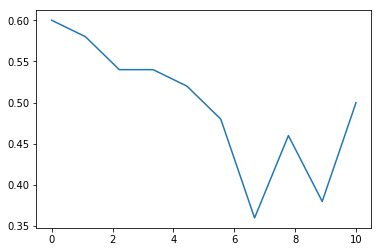

In [3]:
from scipy import misc
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
path1="data_set1"
imagepaths1=[os.path.join(path1,f) for f in os.listdir(path1) if f.endswith('.jpg')]
#print(imagepaths1)
b=[]
l=1

for imagepath1 in imagepaths1:
    a=misc.imread(imagepath1)
    #print(a.shape)
    b=a.reshape(1,196*196)
    
    if(l==1):
        positive=b
        l=0
    else:
        positive=np.vstack((positive,b))
        
print (positive.shape)

path0="data_set0"
imagepaths0=[os.path.join(path0,f) for f in os.listdir(path0) if f.endswith('.jpg')]
#print(len(imagepaths0))

l=1

for imagepath0 in imagepaths0:
    a=misc.imread(imagepath0)
    #print(a.shape)
    b=a.reshape(1,196*196)
    
    if(l==1):
        negative=b
        l=0
    else:
        negative=np.vstack((negative,b))

print(negative.shape)    


#****************
#pca of positive data
pca=PCA(n_components=20).fit(positive)

newdata1=pca.transform(positive)
print(newdata1.shape)

#****************
#pca of negative data
pca=PCA(n_components=20).fit(negative)

newdata0=pca.transform(negative)
print(newdata0.shape)



#forward feature selection
label1=np.ones((50,1))
label0=np.zeros((50,1))
nd1=np.hstack((newdata1,label1))
print(nd1)
nd0=np.hstack((newdata0,label0))
print(nd0)
newdata=np.vstack((nd1,nd0))
a=np.random.randint(0,100, size=100)
newdata=newdata[a,:]
print (newdata)
nd=newdata[:,:20]
y=newdata[:,20]
print(nd)
print(y)



acc=[]

for j in range(0,20):
    clf=svm.SVC(kernel='linear')
    xtrain,xtest,ytrain,ytest=train_test_split(nd[:,:(j+1)],y,test_size=0.25,random_state=1)
    clf.fit(xtrain,ytrain)
    ypredicted=clf.predict(xtest)
    acc.append(metrics.accuracy_score(ytest, ypredicted))
    print(acc[j])
    

print(acc)



x=np.linspace(0,20,20)
plt.plot(x,acc)
plt.show()













        

